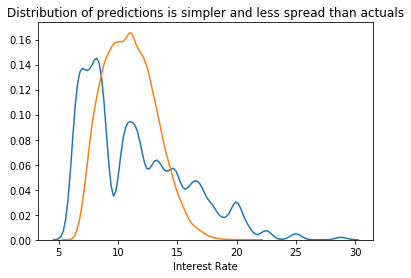

In [1]:
%matplotlib inline

from joblib import load
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pipeline = load('pipeline.joblib')
history = pd.read_csv('lending-club.csv')
X = history.drop(columns='Interest Rate')
y_pred_log = pipeline.predict(X)
y_pred = np.expm1(y_pred_log)

fig, ax = plt.subplots()
sns.distplot(history['Interest Rate'], hist=False, kde=True, ax=ax, label='Actual')
sns.distplot(y_pred, hist=False, kde=True, ax=ax, label='Predicted')
ax.set_title('Distribution of predictions is simpler and less spread than actuals')
ax.legend().set_visible(False)

In [2]:
from plotly.offline import init_notebook_mode, iplot
from plotly.tools import mpl_to_plotly
init_notebook_mode(connected=True)

plotly_fig = mpl_to_plotly(fig)
plotly_fig['layout']['showlegend'] = True

iplot(plotly_fig)